### Introduction

Differentiation has been a major topic of calculus for a long time for its wide application in studies of almost all major science deciplines. It's especially often used in studying the behaviours of models and is also essential for solving optimization problems. Multiple ways have been developed to solve differential equations, though deriving an exact fomula or through estimating by numerical methods such as Newton's method. Automatic differentiation is one important way that we use to solve differential problems. It utilizes the power of a computer to replace manual work and yield results with desired efficiency. It’s important because sometimes differentiation requires tedious calculations and is also likely to be inaccurate due to complexity of equations, and we want computers to solve these problems automatically for us. Thus, in this project, we will implement an automatic diffrentiator using forward mode to solve differentiation problems for users. 


### Background

Chain rule and graph structures will be the cornerstone underlying our program to differentiate various functions. The differentiation process of a complex function can be decomposed into calculating the derivatives of a chain of simple functions. The idea of computation graph will guide how the chain of derivatives will be evaluated and combined to reach the final answer.

#### Chain Rule
One important result in calculus that we use in differentiation is the chain rule, where we calculate the derivative of some function `f(x)` with respect to `x` as the product of the derivative of `f` with respect to some other variable that is also a function of `x` and the derivative of that function with respect to `x`. In mathematical formula, it's represented below:
$$\frac{d}{dx}f\left[u(x)\right] = f'\left[u(x)\right] \cdot u'(x)$$
or
$$\frac{dy}{dx} = \frac{dy}{du} \times \frac{du}{dx}$$
where `f`,`y`,`u` are functions of `x`.
Chain rule also works in multidimentional case when we have a vector of variables. Then `f`,`y`,`u` will be vectors and their derivatives will be matrices. This derivaitve is called the Jacobian. The Jacobian for a function of two inputs and two outputs is shown below.

For $f: \mathbb{R}^2 \rightarrow \mathbb{R}^2, J = \begin{bmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{bmatrix}
$

We then take the matrix product of the two calculated derivatives to get the final answer, which is again a vector. Chain rule underlies our automatic differentiation package as it allows us to break down equations to small parts of elementary functions for calculating derivative, and we then aggregate the final result using chain rule. A better exlaination of how we aggregate results will be explained under graph structure of calculation, and before that we would introduce what we mean by elemetary functions. 

#### Elementary functions
By elementary functions, we mean the functions that cannot be decomposed as aan appregation of some functions applied one by another. These functions include +, -, x, /, square root, logarithms and trigonometric functions. The functions input that we are going to deal with can be regarded as a combination of one or more such functions.


#### Graph structure of Calculation
Graph structure of calculate presents better visualization of how we use chain rule to break down complex functions to elememtary functions. Here we include a small example of the graph sturcture of a simple function: $f(x,y) = sin(x) + 2y$
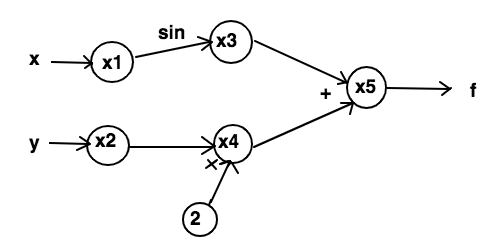

As we can see, the sample function is broken into nodes, where each node applies one elementary function to the variable and the function is eventrually composed at the end of the process. Through navigating trhough these nodes, we can calculate the value and derivative at each step and record and update these values when moving forward. At the final node, we shall have the desired result. For vector functions, we can just break each vector into a sequence of functions and apply this method to each of them.

#### Automatic differentiation
The introdution above shows one way of doing automatc differentiation, the forward mode, which we will implement in our package. Indeed, automatic differentiation is a collection of comptational methods to numerically evaluate the derivative of a function through breaking down the function to elementary operations.
It is efficient since we evaluate the function value and its derivative in linear time, based on the complexity of the function, since the chain rule and the graph structure works from the inside with the most basic pieces out to the full complexity of the whole function. It is also precise as it evaluate to machine precision at each step of the process.

### How to Use SuperDifferentiator

The `SuperDifferentiator` package is a very simple way to calculate derivatives for functions of one input and one output. In the near future we will be increasing the functionality so that the Jacobian can be calculated for functions of several inputs and several outputs.

The user imports our package and begins building the function they want to find the function value and derivative of using elementary function. In the `superdifferentiator.forward.functions` module we have defined classes for each elementary function.

#### Install package

The user should type the following command line in terminal.

`pip install SuperDifferentiator`

Then the package will be installed. Notice that the package requires the pip vertion(?) and python version after 3.5(e.g.,not sure if we need these).

#### Import package
The user can import the library with the code below:

```
>>> import superdifferentiator.forward.functions as AD
```

Notice that the user can also import specific functions they want if they know what they are going to use. For example, if they only need to apply basic functions and sin function, they can do:

```
>>> from superdifferentiator.forward.functions import X,Sin
```
Examples will be given in how functions can be used in both cases.

#### Use package


The user begins with an `X` object, passing in a value $\alpha$, which is the value you want to evaluate the function and derivative at. From this object, more complex functions, like polynomials, trigonometric functions, and any combinations can be formed. This is shown in an example below, which calculates the function value and derivative of $f(x) = \text{sin}\left[\text{ln}(x) + 3x^2 + 2x + 7\right]$ for $x = 3$.

```
>>> from superdifferentiator.forward.functions import X, Ln, Sin
>>> x = X(3)
>>> fx = Sin(Ln(x) + (3 * x ** 2) + (2 * x) + 7)
>>> fx.val, fx.der
(-0.25505810186107586, -19.6608231486877)
```






```
import AD

x = AD.AutoDiffForward(2.0)
f_x = 3 * x ** 2 + 2 * x + 5
print(f_x.val, f_x.der)

y1 = AD.AutoDiffForward(3.0)
y2 = AD.AutoDiffForward(4.0)
f_y = 3 * y1 **2 + 2 * y1 * AD.sin(y2) + 5
print(f_y.val, f_y.der)

f = input(‘Input the function’)
alpha = input(‘Input the value to evaluate the function and derivative’)
ad = AD.AutoDiffForwardDemo([alpha], [f])

print(ad.val, ad.der)
```



### Software Organization

Discuss how you plan on organizing your software package.

* What will the directory structure look like?

```
code\
	driver.py
	superdifferentiator\
		__init__.py
        forward\
            __init__.py
            AD.py
            functions.py
        tests\
            __init__.py
            test_AD.py
```

* What modules do you plan on including? What is their basic functionality?

We have two main modules, `AD.py` and `functions.py`. The `AD.py` module contains the `AD` class. We talk more about the specific implementation below, but the `AD` class stores the function value and derivative for a function, and implements all of the operator overloading, so that we can easily add, subtract, multiply, etc. functions with each other. This is the base class that all of the elementary function classes extend from.

The `functions.py` class contains several classes for each elementary function, `X`, `Ln`, `Log`, `Exp`, `Abs`, `Sin`, `Cos`, and `Tan`. Since each of these extend from `AD`, they have their function value and derivative stored, and are also able to interact with each other through operator overloading. These classes and their implementation is discussed more below.

* Where will your test suite live? Will you use TravisCI? CodeCov?

The test suite lives in the `code/tests/` directory and can easily be ran using `pytest`. Yes, we will use both TravisCI and CodeCov for testing.

* Tests
    - All tests are saved in file tests_AD.py under /code/tests directory.
    - We run them with help of TravisCI and CodeCov, where TravisCI will automatically check if all tests are passed when we pushed codes written in local repository to github, and CodeCov will automatically check the test coverage.
    - We have badges put in the README file for both TravisCI and CodeCov, which will tell if the result for the most recent pull. We only merge new changes to master branch when test results are positive.
    
* How will you distribute your package (e.g. PyPI)?

We will distribute our package using TestPyPI.

* How will you package your software? Will you use a framework? If so, which one and why? If not, why not?

We will use PyScaffold to package our software. We choose it because it is convenient.

### Implementation

* What are the core data structures?

Currently, since we only deal with functions of a single input and a single output, we only needed to store the function value and derivative. As the user builds their function, the function value and derivative is calculated and passed on to the next function the user is using.

To deal with functions with multiple inputs and one output, we will modify the `AD` class to store the partial derivatives of the function with respect to each input variable. This will be done by storing the partial derivative values in a dictionary, mapping each input to it's partial derivative by a given 'key' in the form of a string. This key will be given when the user creates the `X` object. We can easily update the derivative values as the user interacts the function with other functions, and we can also easily add new partial derivatives for other variables if the user decides to multiply, for example, $f(x, y) \cdot g(z)$. An example is shown below.

```
>>> x = X(3, 'x')
>>> y = X(2, 'y')
>>> f_xy = 3 * x * y
>>> z = X(5, 'z')
>>> g_z = z ** 2
>>> h_xyz = f_xy * g_z
```

Note: the user can use any label for the variables that they desire. Typical math characters like `x`, `y`, `z` can be used, or `x1`, `x2`, etc. This is just for the system to know the difference between the independent variables.

To deal with functions with multiple inputs and multiple outputs, behind the scenes we will just store a list of `AD` objects. The full Jacobian can be acquired from this by just pulling the partial derivatives from the dictionary and putting them in a matrix in the correct order.

* What classes will you implement?

The base class for all functionality is the `AD` class, located in the `AD.py` module. This class stores the function value and the derivative at the point the user wants to evaluate. In this class we also implement all of the operator overloading by implementing the `__add__`, `__mul__`, `__sub__`, etc. methods. This allows us to easily interact `AD` objects to build the function we want the derivative of.

We also have classes for each elementary operation in the `functions.py` module: `X`, `Ln`, `Log`, `Exp`, `Abs`, `Sin`, `Cos`, `Tan`. These all extend from the `AD` class so they can be interacted using python's build in operations. The `X` class is where the user starts, passing in the value $\alpha$ that they want to evaluate the function value and derivative at. From this, the user can build more complex functions, like polynomials using python operations +, -, \*, /, and \*\*, or can build functions involving the elementary function. When you instantiate an object of one of the elementary functions, you pass in the function that you want this elementary function to take the value of (the `Log` class also takes the base of the log as the second argument). For example, if you build the function $f(x) = x^2 + 2x + 3$ and want to find the sin of this function at $\alpha = 2$, you can do so as demonstrated below.

```
>>> x = X(2)
>>> fx = (x ** 2) + (2 * x) + 3
>>> sin_fx = Sin(fx)
```

* What method and name attributes will your classes have?

The only two attributes the user needs are `val` and `der` which are stored in the `AD` class. In the `AD` class we implement the following functions for operator overloading: `__add__`, `__radd__`, `__mul__`, `__rmul__`, `__sub__`, `__rsub__`, `__neg__`, `__truediv__`, `__rtruediv__`, `__pow__`, and `__rpow__`. This allows the user to make full use of the python operators +, -, \*, /, and \*\*. Since each elementary function class extends from `AD`, they get the full functionality as well.

As we implement functions of multiple inputs and multiple outputs, we will be adding a function to get the partial derivative with respect to one of the variables, as we cannot simply store the derivative in one variable since we have many derivatives. We will also allow the user to get the full Jacobian easily.

* What external dependencies will you rely on?

The only external dependency is `numpy`.

* How will you deal with elementary functions like sin, sqrt, log, and exp (and all the others)?

We deal with these elementary functions by creating a class for each of these in the `functions.py` module. Each of these extend from the `AD` class, located in the `AD.py` module, so they each get a function value and derivative, and they can also interact with each other through the operator overloading, also implemented in the `AD` class. To use these, you first create an `X` object, passing in the value you want to evaluate the function and derivative at. With this `X` object, we can build more complex polynomials using the python operators +, -, \*, /, and \*\*. You can also build functions involving these elementary functions by creating an object of the desired type and passing in the function. For the `Log` class, you also pass in the base of the log you want to take. Examples are shown below.

```
>>> x = X(5)
>>> sin_x = Sin(x)
>>> sin_poly = Sin((x ** 2) + (3 * x) + 2)
>>> sin_ln = Sin(Ln(x))
```